In [41]:
library(ggplot2)
library(dplyr)

In [13]:
## input files folder
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/input_files/DA_all_conditions/"

In [8]:
### Neuroseq 10x data
### DA - all conditions (D30, D52, D52ROT)
### pseudo-cells
pheno_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/pseudocells_Danai/txt_files/"

In [9]:
## make phenotype file

In [10]:
# Phenotype (genes X pseudo-cells)
phenotype_file = paste0(pheno_dir,"Pseudobulk_DA_pseudocells_res4.tsv")
phenotype = read.csv(phenotype_file, sep="\t", row.names=1)
phenotype[1:5,1:5]

,MIR1302.10,FAM138A,OR4F5,RP11.34P13.7,RP11.34P13.8
HPSI0714i-iudw_1--DA--d30--0,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--1,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--2,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--3,0,0,0,0,0
HPSI0714i-iudw_1--DA--d30--4,0,0,0,0,0


In [11]:
phenotype_df = t(phenotype)
phenotype_df[1:5,1:5]

,HPSI0714i-iudw_1--DA--d30--0,HPSI0714i-iudw_1--DA--d30--1,HPSI0714i-iudw_1--DA--d30--2,HPSI0714i-iudw_1--DA--d30--3,HPSI0714i-iudw_1--DA--d30--4
MIR1302.10,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11.34P13.7,0,0,0,0,0
RP11.34P13.8,0,0,0,0,0


In [14]:
pheno_filename = paste0(mydir,"phenotype.csv")
write.csv(phenotype_df, pheno_filename, quote = F)

In [ ]:
## make sample mapping file

In [15]:
head(gsub("--.*","",colnames(phenotype_df)))

[1] "HPSI0714i-iudw_1" "HPSI0714i-iudw_1" "HPSI0714i-iudw_1" "HPSI0714i-iudw_1"
[5] "HPSI0714i-iudw_1" "HPSI0714i-iudw_1"

In [21]:
df = data.frame(genotype_individual_id = gsub("--.*","",colnames(phenotype_df)),
                phenotype_sample_id = colnames(phenotype_df))
nrow(df)
head(df,2)

[1] 9982

genotype_individual_id,phenotype_sample_id
HPSI0714i-iudw_1,HPSI0714i-iudw_1--DA--d30--0
HPSI0714i-iudw_1,HPSI0714i-iudw_1--DA--d30--1


In [22]:
smf_filename = paste0(mydir,"sample_mapping_file.csv")
write.csv(df, smf_filename, quote = F, row.names = F)

In [15]:
## make env file (PCs)

In [16]:
pcs = prcomp(t(phenotype_df))
summary(pcs)

Importance of components:
                          PC1      PC2     PC3      PC4      PC5      PC6
Standard deviation     65.311 27.57705 24.6687 18.81065 15.30879 13.40252
Proportion of Variance  0.199  0.03548  0.0284  0.01651  0.01094  0.00838
Cumulative Proportion   0.199  0.23452  0.2629  0.27942  0.29036  0.29874
                            PC7      PC8      PC9    PC10   PC11    PC12
Standard deviation     12.61205 10.73584 10.19485 9.49625 8.7825 8.47433
Proportion of Variance  0.00742  0.00538  0.00485 0.00421 0.0036 0.00335
Cumulative Proportion   0.30616  0.31154  0.31639 0.32059 0.3242 0.32754
                          PC13    PC14   PC15    PC16    PC17    PC18    PC19
Standard deviation     8.17546 7.93073 7.6040 7.49765 7.23260 6.82430 6.36047
Proportion of Variance 0.00312 0.00293 0.0027 0.00262 0.00244 0.00217 0.00189
Cumulative Proportion  0.33066 0.33360 0.3363 0.33892 0.34136 0.34353 0.34542
                          PC20   PC21   PC22    PC23    PC24    PC25    PC

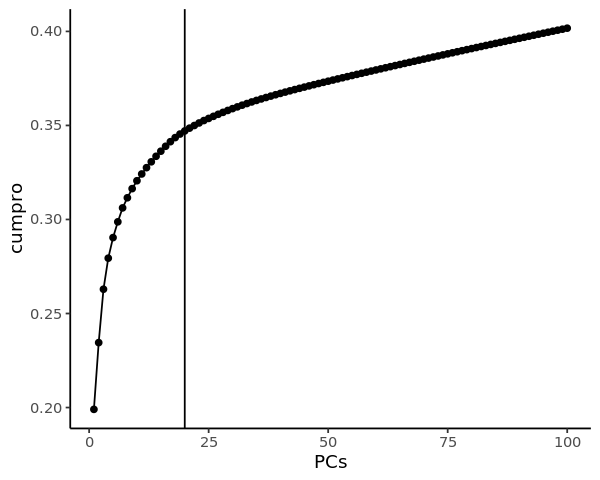

In [20]:
N = 100
x = 20
df0 = data.frame(PCs = 1:N,
                 cumpro = summary(pcs)$importance[3,1:N])
# head(df0)
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df0, aes(x = PCs, y = cumpro)) + geom_point() + geom_line() + theme_classic() + 
    geom_vline(xintercept = x)

In [23]:
df_pca = pcs$x
rownames(df_pca) = colnames(phenotype_df)
df_pca[1:5,1:5]

,PC1,PC2,PC3,PC4,PC5
HPSI0714i-iudw_1--DA--d30--0,-6.332746,52.67603,-19.745818,-5.913064,13.089023
HPSI0714i-iudw_1--DA--d30--1,-60.584467,28.49589,12.293376,21.019732,3.292923
HPSI0714i-iudw_1--DA--d30--2,-45.236900,27.04194,14.163562,17.086790,10.998458
HPSI0714i-iudw_1--DA--d30--3,-59.512138,36.67466,-8.925164,7.242682,4.666824
HPSI0714i-iudw_1--DA--d30--4,48.322898,26.06228,25.944021,9.538588,-10.395300


In [25]:
nrow(df_pca)

[1] 9982

In [24]:
env_filename = paste0(mydir,"10PCs.csv")
write.csv(df_pca[,1:10], env_filename, quote = F)

In [27]:
## make feature-variant filter file

In [35]:
fvf_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_Storey.csv"
df_fvf = read.csv(fvf_filename, row.names = 1)
head(df_fvf,2)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


In [36]:
df_fvf_DA = df_fvf[grep("DA", df_fvf$label),]
nrow(df_fvf_DA)
head(df_fvf_DA,2)

[1] 2354

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
9,9_36382790_A_G,3.841554e-09,0.2678636,0.04547094,1.059426e-04,9,36336393,36487545,165,165,...,9,36382790,G,1,0.2575758,0.4164226,ENSG00000137075,2.826764e-03,1.610653e-03,DA_D30
143,9_37422656_C_T,1.080706e-18,0.4319122,0.04893397,1.254483e-09,9,37422663,37436987,165,165,...,9,37422656,T,1,0.3606061,0.6138967,ENSG00000137106,1.482853e-07,8.449102e-08,DA_D30


In [37]:
unique(as.character(df_fvf_DA$label))

[1] "DA_D30"     "DA_D52"     "DA_D52_ROT"

In [38]:
DA_fvf = df_fvf_DA[,c("snp_id","feature_id")]
colnames(DA_fvf)[2] = "ensembl_gene_id"
head(DA_fvf,2)

,snp_id,ensembl_gene_id
9,9_36382790_A_G,ENSG00000137075
143,9_37422656_C_T,ENSG00000137106


In [39]:
#load map HGNC to ensembl
mapping_df = read.csv('/nfs/leia/research/stegle/dseaton/genomes/hg19/annotation/geneid_mappings/hgnc_symbol2ensembl_gene_id.txt', sep='\t')
head(mapping_df,2)

hgnc_symbol,ensembl_gene_id
SLC25A26,ENSG00000261657
,ENSG00000223116


In [42]:
nrow(DA_fvf)
DA_fvf2 = inner_join(DA_fvf, mapping_df)
nrow(DA_fvf2)

[1] 2354

Joining, by = "ensembl_gene_id"
Warning message:
“Column `ensembl_gene_id` joining factors with different levels, coercing to character vector”

[1] 2354

In [43]:
head(DA_fvf2,,2)

snp_id,ensembl_gene_id,hgnc_symbol
9_36382790_A_G,ENSG00000137075,RNF38
9_37422656_C_T,ENSG00000137106,GRHPR
9_35595006_T_G,ENSG00000198722,UNC13B
5_79950781_A_G,ENSG00000113318,MSH3
5_81395824_T_G,ENSG00000152348,ATG10
5_76728085_C_T,ENSG00000164253,WDR41


In [46]:
DA_fvf2$feature = DA_fvf2$hgnc_symbol

In [47]:
fvf_filename = paste0(mydir,"DA_eqtl_allconditions_FDR5pct.csv")
write.csv(DA_fvf2, fvf_filename, quote = F, row.names = F)